In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **1) Data Cleaning and Preperation**

#### 1.1 Clean files in 'data' and write them out to a new folder 'clean_data'

In [2]:
list_files = glob.glob("./data/*.csv")
for file in list_files:
    df = pd.read_csv(file)

    # Find and delete recurring header rows
    filt = df['Order ID'] == 'Order ID'
    df.drop(index = df[filt].index, inplace=True)

    # Find and delete duplicate rows
    dup = df.duplicated(keep='first')
    df.drop(index = df[dup].index, inplace=True)

    # Find and delete rows with all values as NaN
    df.dropna(how='all', inplace=True)

    filename = os.path.basename(file)
    new_filename = f'./clean_data/{filename}'
    df.to_csv(new_filename, index = False)

#### 1.2 Merge the files in 'clean_data' into one file 'all_data.csv'

In [3]:
list_files = glob.glob("./clean_data/*.csv")
merged = pd.DataFrame()

for file in list_files:
    current_df = pd.read_csv(file)
    merged = pd.concat([merged, current_df]).sort_values(by='Order Date')
    
merged.to_csv("all_data.csv", index=False)

#### 1.3 Read in the merged data

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001"
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


#### 1.4 Convert Order Date into datetime dtype

In [5]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [6]:
all_data.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

#### 1.5 Drop all data from any year other than 2019

In [7]:
all_data[all_data['Order Date'].dt.year == 2020].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
302,311386,iPhone,1,700.00,2020-01-01 00:10:00,"730 Pine St, San Francisco, CA 94016"
303,311386,Apple Airpods Headphones,1,150.00,2020-01-01 00:10:00,"730 Pine St, San Francisco, CA 94016"
304,300759,20in Monitor,1,109.99,2020-01-01 00:14:00,"193 5th St, Austin, TX 73301"
305,302393,Lightning Charging Cable,1,14.95,2020-01-01 00:14:00,"108 Jefferson St, Boston, MA 02215"
306,297817,iPhone,1,700.00,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001"


In [8]:
all_data = all_data[all_data['Order Date'].dt.year == 2019]

In [9]:
all_data[all_data['Order Date'].dt.year == 2020]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### 1.6 Add Sales column

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90


#### 1.7 Add City column

In [11]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,New York City (NY)
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,San Francisco (CA)
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,New York City (NY)
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,Dallas (TX)
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,Atlanta (GA)


#### 1.8 Add Months column

In [12]:
all_data['Months'] = all_data['Order Date'].dt.month_name()
all_data.loc[0:4, 'Months']

0    January
1    January
2    January
3    January
4    January
Name: Months, dtype: object

## **2) Data Exploration!**

#### 2.1 What was the best month for sales? How much was earned that month?

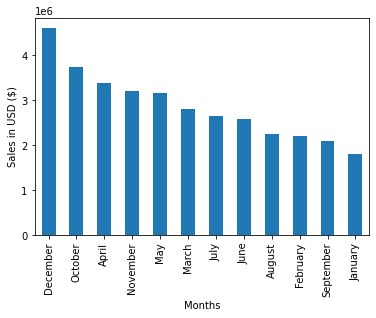

In [13]:
all_data.groupby('Months')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', ylabel='Sales in USD ($)');

***December** was the best month for sales with a total of **USD 4,608,295.70***

#### 2.2 Which city sold the most product?

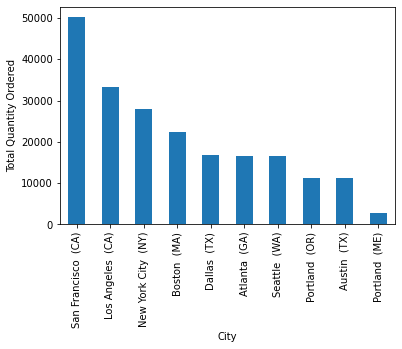

In [14]:
all_data.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar', ylabel='Total Quantity Ordered');

*San Francisco (CA) was the best city having sold **50,156** products*

#### 2.3 What time should advertisements be displayed to maximize likelihood of customer's buying products?

In [15]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Months,Hour,Count
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,New York City (NY),January,3,1
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,San Francisco (CA),January,3,1
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,New York City (NY),January,4,1
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,Dallas (TX),January,5,1
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,Atlanta (GA),January,6,1


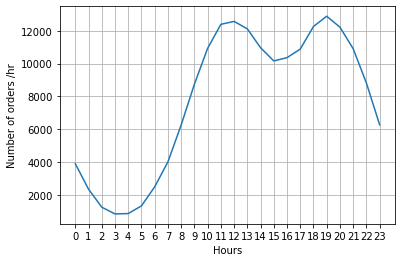

In [16]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).sum()['Count'])
plt.xticks(keys)
plt.ylabel('Number of orders /hr')
plt.xlabel('Hours')
plt.grid()
plt.show()

*Slightly between **7:00am - 12:00pm** or **5:00pm - 7:00pm***

#### 2.4 What product sold the most? Why do you think it sold the most?

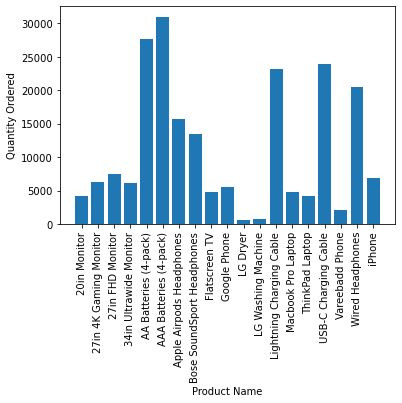

In [17]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=10)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product Name')
plt.show()

***AAA batteries (4-pack)** are the most sold item*

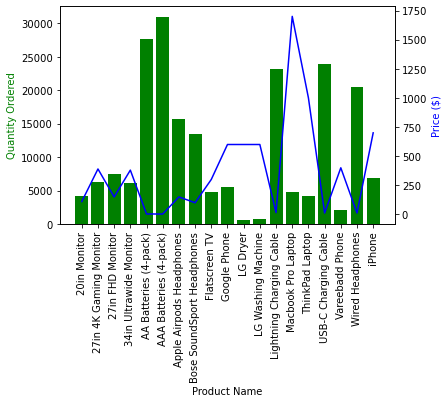

In [18]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=10)

fig.show()

*From the graph above, batteries are the most sold product because they are cheap. Another reason could be due to the fact that many modern devices require batteries to function*